In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('MBA.csv')

In [3]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [4]:
df.head(len(df)) 

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [5]:
df.shape

(6194, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [7]:
df.isnull().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

<Axes: >

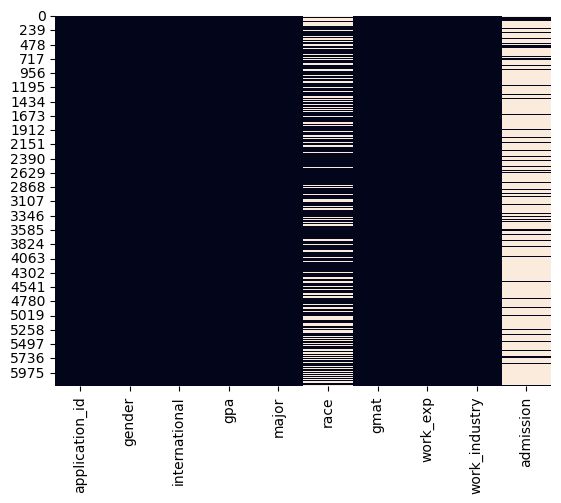

In [8]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False) 

In [9]:
df['race'].fillna('Unknown', inplace=True)
df

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,Unknown,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,Unknown,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,Unknown,590.0,5.0,Other,NaN


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

application_id    0
gender            0
international     0
gpa               0
major             0
race              0
gmat              0
work_exp          0
work_industry     0
admission         0
dtype: int64

In [12]:
df.describe()

,application_id,gpa,gmat,work_exp
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2638.650000,3.350730,690.820000,5.033000
std,1909.980741,0.127772,40.841102,1.005446
min,1.000000,2.890000,570.000000,1.000000
25%,770.000000,3.270000,670.000000,4.000000
50%,2498.000000,3.350000,690.000000,5.000000
75%,4289.500000,3.430000,720.000000,6.000000
max,6192.000000,3.740000,780.000000,8.000000


In [13]:
df.describe(include=['object'])

,gender,major,race,work_industry,admission
count,1000,1000,1000,1000,1000
unique,2,3,6,14,2
top,Female,Humanities,Unknown,Consulting,Admit
freq,500,408,308,257,900


In [14]:
corr = df.corr()

C:\Users\88017\AppData\Local\Temp\ipykernel_43000\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


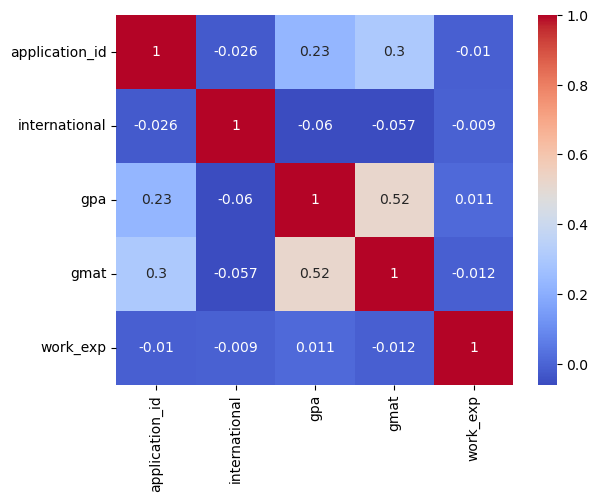

In [15]:
import matplotlib.pyplot as plt
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

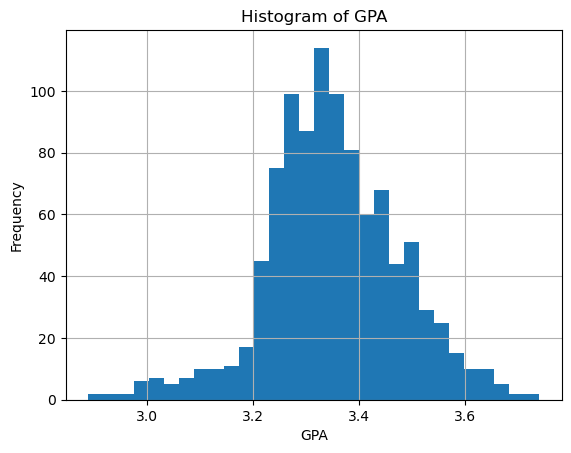

In [16]:
import matplotlib.pyplot as plt
df['gpa'].hist(bins=30)
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Histogram of GPA')
plt.show()

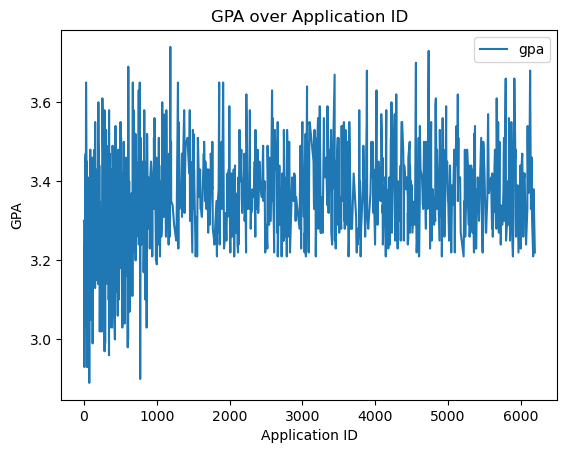

In [17]:
df.plot(x='application_id', y='gpa', kind='line')
plt.xlabel('Application ID')
plt.ylabel('GPA')
plt.title('GPA over Application ID')
plt.show()

In [18]:
mean_gpa_by_major = df.groupby('major')['gpa'].mean()

In [19]:
print(mean_gpa_by_major)

major
Business      3.359692
Humanities    3.351642
STEM          3.340767
Name: gpa, dtype: float64


In [20]:
pivot_table = df.pivot_table(values='gmat', index='major', aggfunc='sum')

# Display the result
print(pivot_table)

                gmat
major               
Business    201660.0
Humanities  282670.0
STEM        206490.0


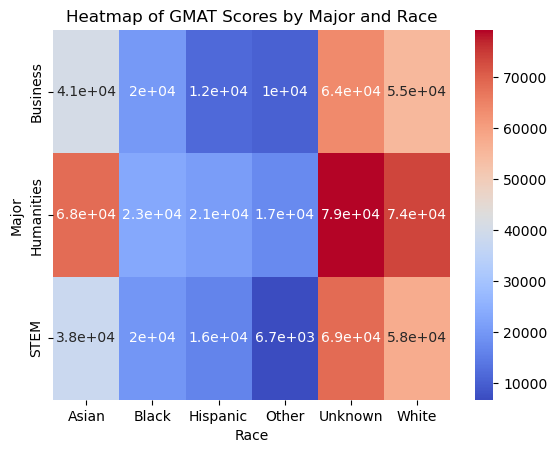

In [21]:
pivot_table = df.pivot_table(values='gmat', index='major', columns='race', aggfunc='sum')

# Create a heatmap using the pivot table data
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)

# Set plot labels and title
plt.xlabel('Race')
plt.ylabel('Major')
plt.title('Heatmap of GMAT Scores by Major and Race')
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


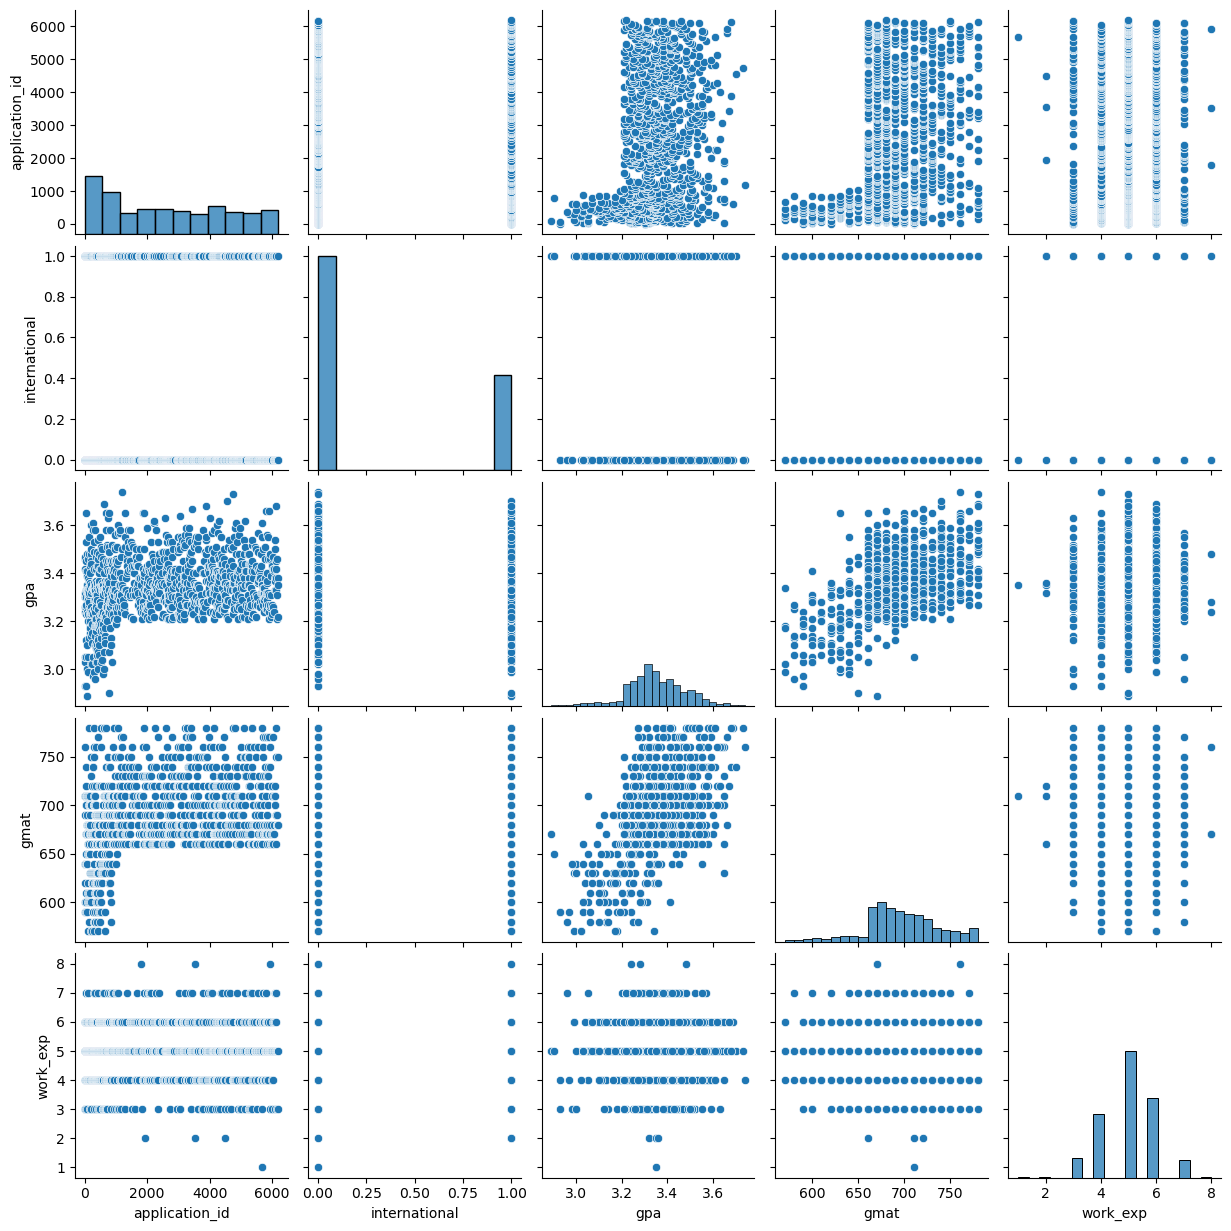

In [22]:


# Create the pairplot using the selected numeric columns
sns.pairplot(df)

# Display the plot
plt.show()

C:\Users\88017\AppData\Local\Temp\ipykernel_43000\954606326.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

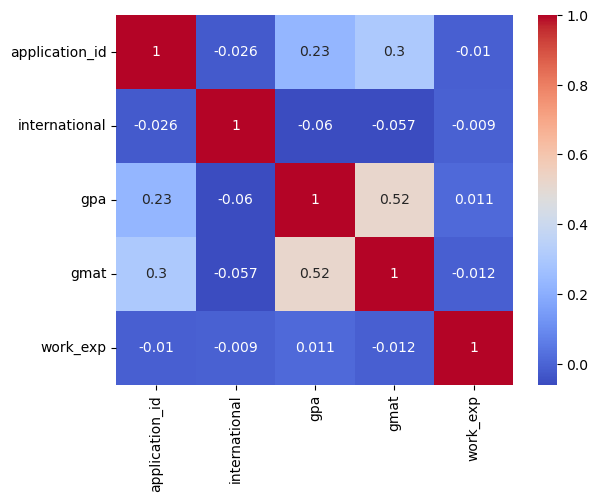

In [23]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns for PCA
numeric_columns = ['gpa', 'gmat', 'work_exp']

# Standardize the numeric data (important for PCA)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_columns])

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Convert the result into a DataFrame for easy interpretation
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

# Display the result
print(pca_df)

         PCA1      PCA2
0    1.504498  1.995367
1   -0.051421  0.051567
2    4.072778  2.046340
3    1.494932 -0.967650
4    3.348997  0.044297
..        ...       ...
995  0.236543  2.028908
996  0.966568  0.052508
997  0.022197  2.011353
998 -1.021165  0.062819
999  0.911200  0.050721

[1000 rows x 2 columns]


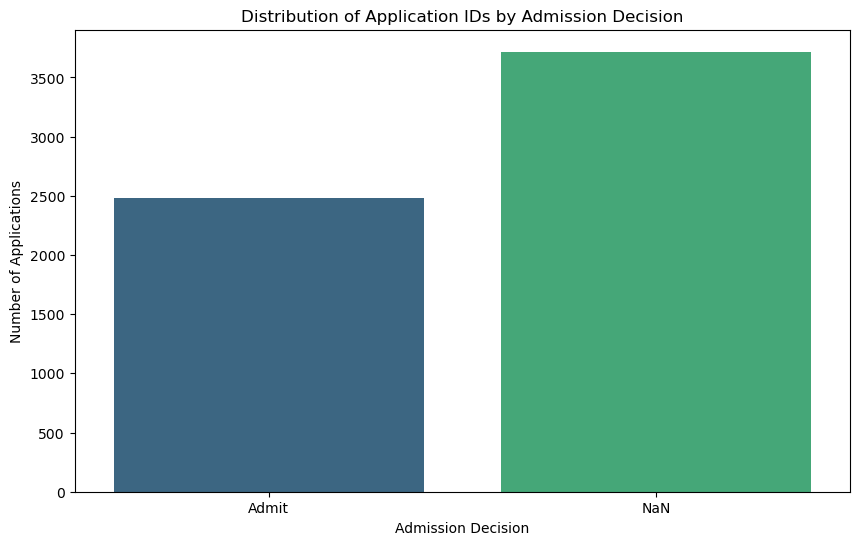

In [25]:
data = pd.DataFrame({
    'application_id': range(1, 6196),  # Range should go from 1 to 6195
    'gender': ['Female', 'Male', 'Female', 'Male', 'Male'] * 1239,
    'international': [False, False, True, False, False] * 1239,
    'gpa': [3.30, 3.28, 3.30, 3.47, 3.35] * 1239,
    'major': ['Business', 'Humanities', 'Business', 'STEM', 'STEM'] * 1239,
    'race': ['Asian', 'Black', 'NaN', 'Black', 'Hispanic'] * 1239,
    'gmat': [620, 680, 710, 690, 590] * 1239,
    'work_exp': [3, 5, 5, 6, 5] * 1239,
    'work_industry': ['Financial Services', 'Investment Management', 'Technology', 'Technology', 'Consulting'] * 1239,
    'admission': ['Admit', 'NaN', 'Admit', 'NaN', 'NaN'] * 1239
})

# Plot the graph
plt.figure(figsize=(10, 6))
sns.countplot(x='admission', data=data, order=['Admit', 'NaN'], palette='viridis')
plt.title('Distribution of Application IDs by Admission Decision')
plt.ylabel('Number of Applications')
plt.xlabel('Admission Decision')
plt.show()

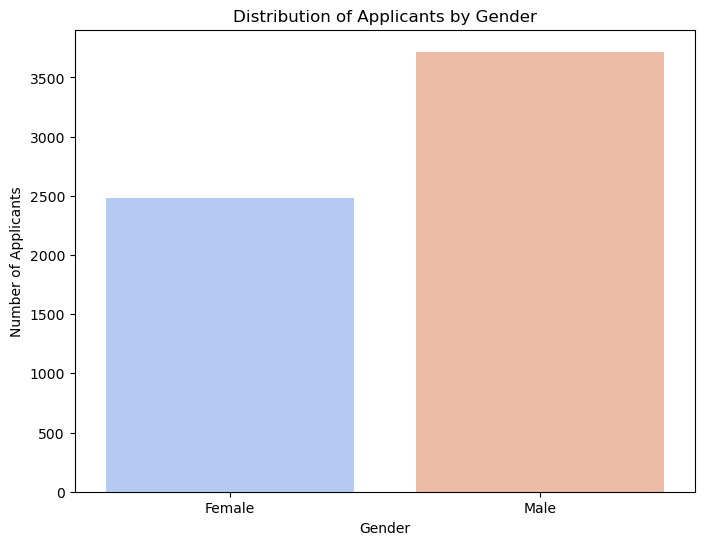

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data, palette='coolwarm')
plt.title('Distribution of Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.show()

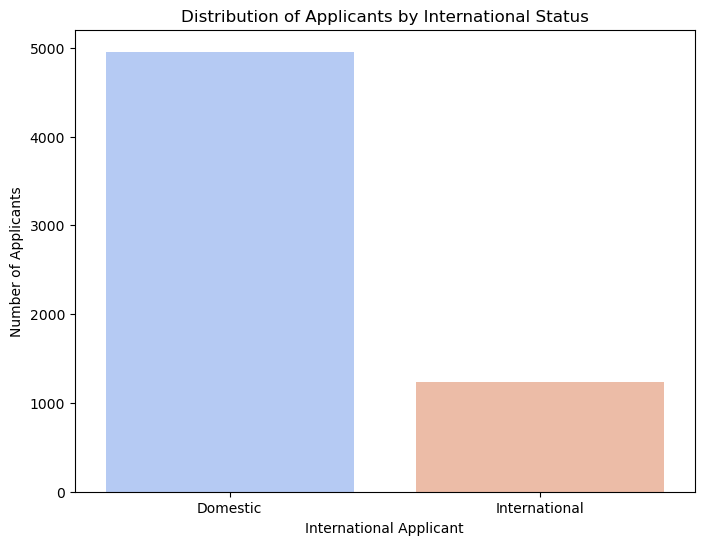

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='international', data=data, palette='coolwarm')
plt.title('Distribution of Applicants by International Status')
plt.xlabel('International Applicant')
plt.ylabel('Number of Applicants')
plt.xticks([0, 1], ['Domestic', 'International'])  # Replace boolean values with meaningful labels
plt.show()

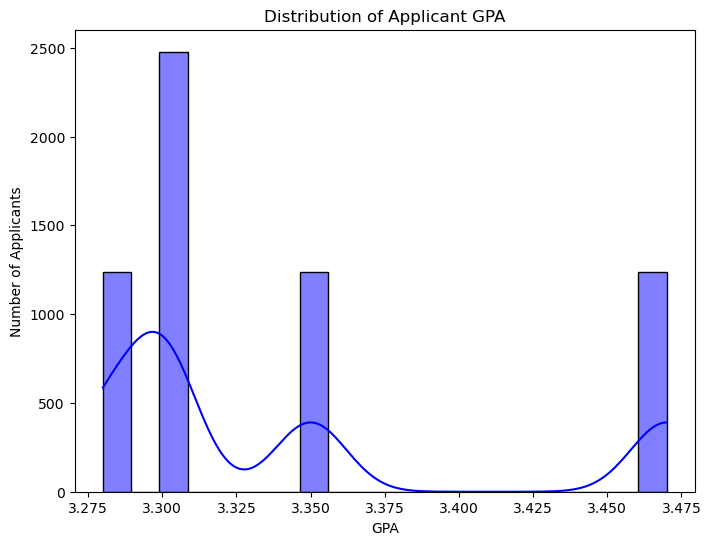

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data['gpa'], bins=20, kde=True, color='blue')
plt.title('Distribution of Applicant GPA')
plt.xlabel('GPA')
plt.ylabel('Number of Applicants')
plt.show()

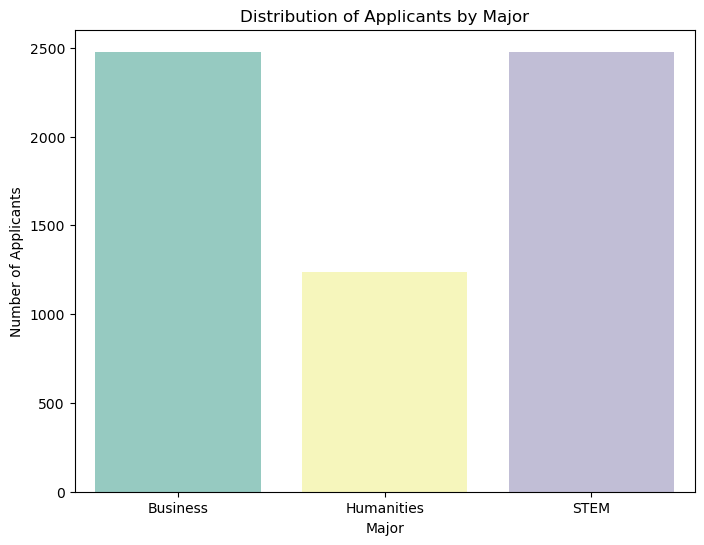

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='major', data=data, palette='Set3')
plt.title('Distribution of Applicants by Major')
plt.xlabel('Major')
plt.ylabel('Number of Applicants')
plt.show()

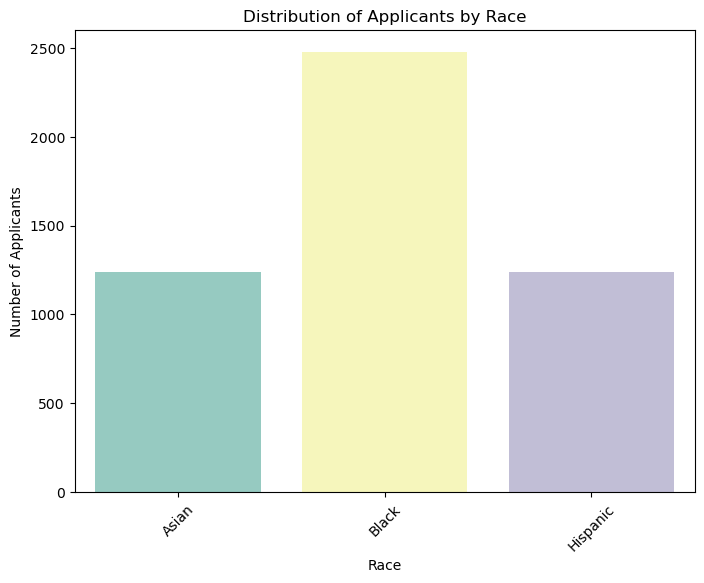

In [30]:
data['race'].replace('NaN', pd.NA, inplace=True)

# Plot the race distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='race', data=data, palette='Set3')
plt.title('Distribution of Applicants by Race')
plt.xlabel('Race')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)
plt.show()

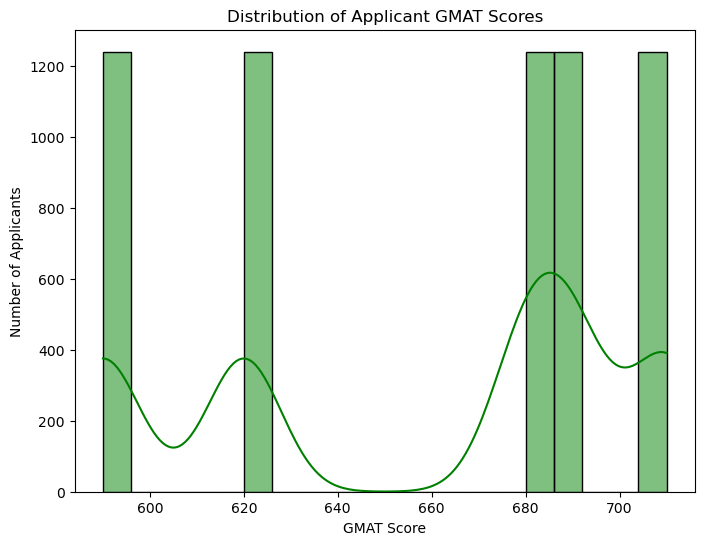

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data['gmat'], bins=20, kde=True, color='green')
plt.title('Distribution of Applicant GMAT Scores')
plt.xlabel('GMAT Score')
plt.ylabel('Number of Applicants')
plt.show()

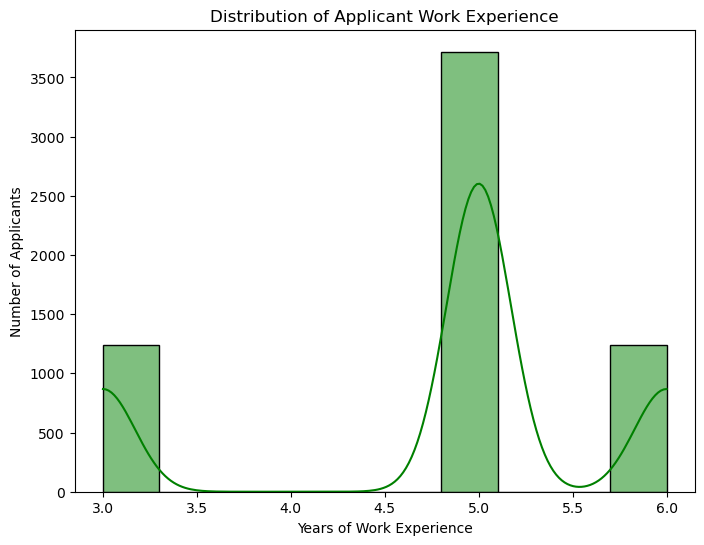

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(data['work_exp'], bins=10, kde=True, color='green')
plt.title('Distribution of Applicant Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Number of Applicants')
plt.show()

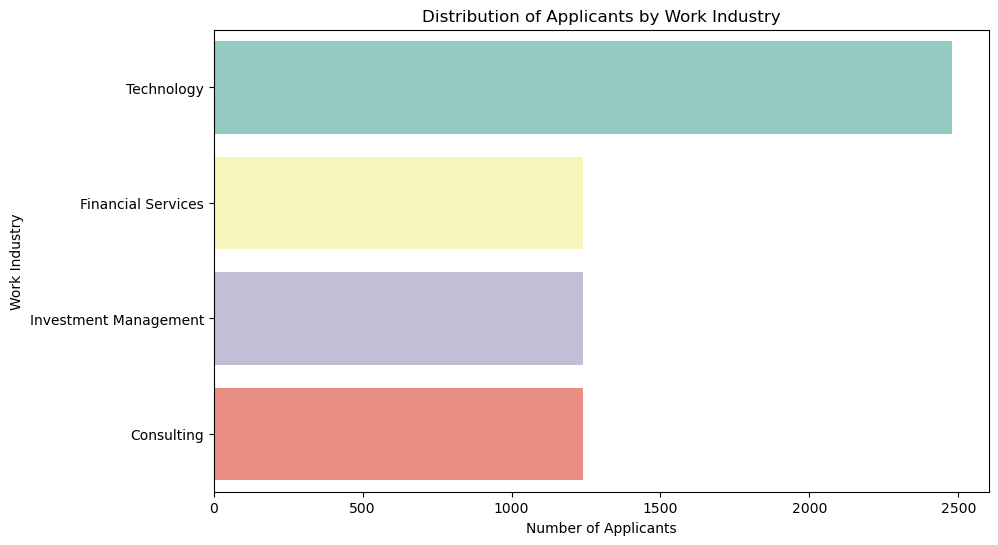

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(y='work_industry', data=data, palette='Set3', order=data['work_industry'].value_counts().index)
plt.title('Distribution of Applicants by Work Industry')
plt.xlabel('Number of Applicants')
plt.ylabel('Work Industry')
plt.show()

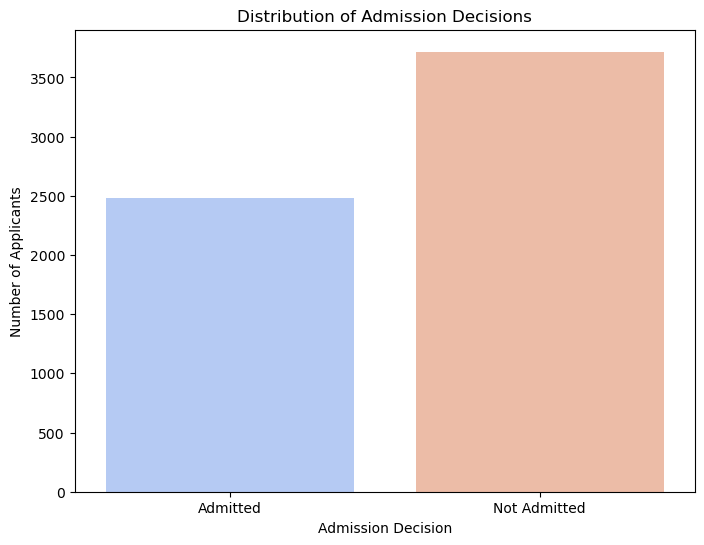

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='admission', data=data, order=['Admit', 'NaN'], palette='coolwarm')
plt.title('Distribution of Admission Decisions')
plt.xlabel('Admission Decision')
plt.ylabel('Number of Applicants')
plt.xticks(ticks=[0, 1], labels=['Admitted', 'Not Admitted'])
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming df is your DataFrame
# Step 1: Create 'admission_binary' where 'Admit' = 1, NaN = 0
df['admission_binary'] = np.where(df['admission'] == 'Admit', 1, 0)

# Step 2: Select relevant features for the model
X = df[['gpa', 'gmat', 'work_exp']]  # You can add more features if necessary
y = df['admission_binary']  # Binary target (0 for rejection, 1 for admit)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Define the model
model = RandomForestClassifier(random_state=42)

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Generate predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Get the feature importances (only available for tree-based models)
importance = model.feature_importances_

# Create a DataFrame to view the importance of each feature
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Step 8: Calculate and display accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Step 9: Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

    Feature  Importance
0       gpa    0.545496
1      gmat    0.339068
2  work_exp    0.115436
Accuracy: 0.8466666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.03      0.04        35
           1       0.88      0.95      0.92       265

    accuracy                           0.85       300
   macro avg       0.48      0.49      0.48       300
weighted avg       0.79      0.85      0.81       300



In [36]:
from sklearn.metrics import accuracy_score, classification_report

# Generate predictions on the test set
y_pred = model.predict(X_test)

# Get the feature importances
importance = model.feature_importances_

# Create a DataFrame to view the importance of each feature
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Calculate and display accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

    Feature  Importance
0       gpa    0.545496
1      gmat    0.339068
2  work_exp    0.115436
Accuracy: 0.8466666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.03      0.04        35
           1       0.88      0.95      0.92       265

    accuracy                           0.85       300
   macro avg       0.48      0.49      0.48       300
weighted avg       0.79      0.85      0.81       300



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = clf.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.785

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.18      0.16        22
           1       0.89      0.86      0.88       178

    accuracy                           0.79       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.81      0.79      0.80       200



In [39]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
from xgboost import XGBClassifier

In [41]:
df['race'].fillna('Unknown', inplace=True)

# Fill missing values in the 'admission' column (target) by removing rows with missing target values
df = df.dropna(subset=['admission'])

# Encode categorical columns (gender, major, race, work_industry) using pd.get_dummies
df_encoded = pd.get_dummies(df[['gender', 'international', 'major', 'race', 'work_industry']])

# Combine with the numeric columns (gpa, gmat, work_exp)
X = pd.concat([df[['gpa', 'gmat', 'work_exp']], df_encoded], axis=1)

# Encode the target column ('admission') as 0 for 'NaN' and 1 for 'Admit'
y = df['admission'].apply(lambda x: 1 if x == 'Admit' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)

Accuracy: 86.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.05      0.07        22
           1       0.89      0.96      0.92       178

    accuracy                           0.86       200
   macro avg       0.51      0.50      0.50       200
weighted avg       0.81      0.86      0.83       200


Feature Importances:
                                 Feature  Importance
21  work_industry_Investment Management    0.088326
3                         international    0.064112
16             work_industry_Consulting    0.054536
23          work_industry_Nonprofit/Gov    0.053075
1                                  gmat    0.052996
6                        major_Business    0.051748
7                      major_Humanities    0.048430
19            work_industry_Health Care    0.048186
9                            race_Asian    0.047814
4                         gender_Female    0.047608
2                              work_

C:\Users\88017\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:50:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [42]:
from sklearn.metrics import confusion_matrix

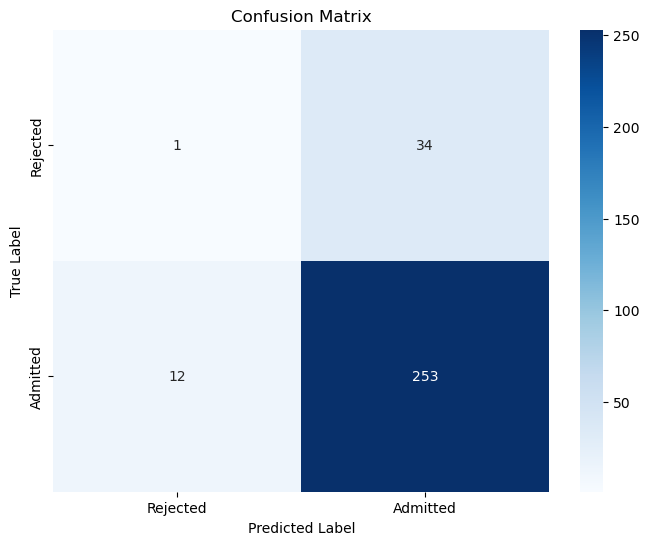

In [44]:
df['admission_binary'] = np.where(df['admission'] == 'Admit', 1, 0)

# Step 2: Select relevant features for the model
X = df[['gpa', 'gmat', 'work_exp']]  # You can add more features if necessary
y = df['admission_binary']  # Binary target (0 for rejection, 1 for admit)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Define the model
model = RandomForestClassifier(random_state=42)

# Step 5: Train the model
model.fit(X_train, y_train)

# Step 6: Generate predictions on the test set
y_pred = model.predict(X_test)

# Step 7: Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 8: Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Admitted'], yticklabels=['Rejected', 'Admitted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1.check null value
2.Describe data
3.Correlation 
4.Histogram of gpa
5.Gpa over application id
6.Heatmap of gmat scores by major and race
7.Pairplot
8.Heatmap correlation 
9.Pca
10.Distribution of application ids by admission decision 
11.Distribution of applicants by gender 
12.Distribution of applicants by international status
13.Distribution of applicants gpa
14.Distribution of applicants by major
15.Distribution of applicants by rase
16.Distribution of applicants by GMAT scores
17.Distribution of applicants work experience 
18.Distribution of applicants by work industry 
19.Distribution of admission decisions 
20.Random forest classifier 
21.Decision tree classifier 
22.XGB classifier 
23.Confusing matrix

Comment-